In [1]:
# Standard PySceneDetect imports:
from scenedetect import VideoManager
from scenedetect import SceneManager
from scenedetect.stats_manager import StatsManager

# For content-aware scene detection:
from scenedetect.detectors import ContentDetector, ThresholdDetector
from customDetector import StdDetector

import matplotlib.pyplot as plt
import cv2

In [4]:
detector1 = ContentDetector(threshold=4, luma_only=True)

In [9]:
detector = StdDetector(skip=50, threshold=10, average=20, window=10)

In [3]:
def find_scenes(video_path, detector=None):
    # Create our video & scene managers, then add the detector.
    video_manager = VideoManager([video_path])
    stats_manager = StatsManager()
    scene_manager = SceneManager(stats_manager)
    
    if detector is None:
        detector = StdDetector()
    scene_manager.add_detector(detector)

    # Improve processing speed by downscaling before processing.
    video_manager.set_downscale_factor()
    
    # Start the video manager and perform the scene detection.
    video_manager.start()
    scene_manager.detect_scenes(frame_source=video_manager)
    
    # Each returned scene is a tuple of the (start, end) timecode.
    return scene_manager.get_scene_list(), stats_manager


In [5]:
scenes, stats = find_scenes('../test/SlideChangeTest1.mov', detector = detector1)
print(len(scenes), scenes)

100%|██████████████████████████████████▉| 2012/2015 [00:21<00:00, 91.88frames/s]

8 [(FrameTimecode(frame=0, fps=59.004392), FrameTimecode(frame=637, fps=59.004392)), (FrameTimecode(frame=637, fps=59.004392), FrameTimecode(frame=756, fps=59.004392)), (FrameTimecode(frame=756, fps=59.004392), FrameTimecode(frame=1141, fps=59.004392)), (FrameTimecode(frame=1141, fps=59.004392), FrameTimecode(frame=1479, fps=59.004392)), (FrameTimecode(frame=1479, fps=59.004392), FrameTimecode(frame=1509, fps=59.004392)), (FrameTimecode(frame=1509, fps=59.004392), FrameTimecode(frame=1798, fps=59.004392)), (FrameTimecode(frame=1798, fps=59.004392), FrameTimecode(frame=1939, fps=59.004392)), (FrameTimecode(frame=1939, fps=59.004392), FrameTimecode(frame=2012, fps=59.004392))]


In [6]:
def plot_scores(stats_manager):
    frame_axis = []
    metrics = {}
    for key in stats_manager._registered_metrics:
        metrics[key] = []

    for frame, val_dict in stats_manager._frame_metrics.items():
        frame_axis.append(frame)
        for key in stats_manager._registered_metrics:
            metrics[key].append(val_dict[key])


    for key in stats_manager._registered_metrics:
        plt.plot(frame_axis, metrics[key], label = key)      

#     if expected is not None:
#         for x in expected:
#             plt.vlines(x, 0, 50)
    plt.legend()
    plt.show()

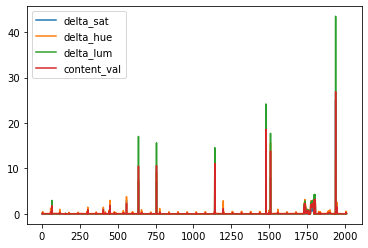

In [7]:
plot_scores(stats)

In [8]:
def select_frames(scenes, method="last"):
    assert method in ["last", "first", "middle"]
    
    if method == "last":
        return [x[1].get_frames()-1 for x in scenes]
    elif method == "first":
        return [x[0].get_frames() for x in scenes]
    elif method == "middle":
        return [(x[0].get_frames()+x[1].get_frames())//2 for x in scenes]
    
    return []
    

In [24]:
frame_lst = select_frames(scenes, method="middle")
frame_lst

[225, 475, 621]

In [29]:
def export_frames(file, frames):
    cap = cv2.VideoCapture(file)
    
    # Find OpenCV version
    (major_ver, minor_ver, subminor_ver) = (cv2.__version__).split('.')
    
    if int(major_ver)  < 3 :
        fps = cap.get(cv2.cv.CV_CAP_PROP_FPS)
    else :
        fps = cap.get(cv2.CAP_PROP_FPS)
    
    length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    i = 0
    while (cap.isOpened() and i < len(frames)):
        j = frames[i]
        seconds = "{:.3f}".format(j / 25)
        cap.set(1, j)
        ret, frame = cap.read()
        if ret == False:
            break
        
#         cv.imwrite("./trainingDataPreprocessing/img_y/" + "{:04d}".format(i) + ".png", frame)
        cv2.imwrite("vv/p"+str(i) + ".bmp", frame)
        print(j, "p", i)
        i += 1
        
    cap.release()
    cv2.destroyAllWindows()


In [58]:
export_frames('../test/SlideChangeTest2.mp4', sorted(frame_lst))

2000 p 0
4050 p 1
4200 p 2
4950 p 3
5625 p 4
6025 p 5
6475 p 6
6900 p 7
7525 p 8
10575 p 9
17544 p 10


In [9]:
expected = np.array([10, 12, 19, 25, 32, 34]) * 2010 / 34

In [25]:
expected

array([ 591.17647059,  709.41176471, 1123.23529412, 1477.94117647,
       1891.76470588, 2010.        ])

In [5]:
from slideDetect import SlideDetect
from util import FileLocator
import os

In [15]:
filename = "../test/SlideChangeTest2.mp4"
locator = FileLocator(filename, os.getcwd() + "/output12/temp")

In [16]:
frame_lst = [x[1].get_frames() for x in scenes]

In [14]:
36520/25

1460.8

In [17]:
SlideDetect.export_frames(locator, frame_lst)

[{'start_time': 0,
  'end_time': 160000,
  'image_time': 52680,
  'image': '/Users/kcluo/PycharmProjects/thoth/python/output12/temp/image/SlideChangeTest2_mp4_52680.png'},
 {'start_time': 160000,
  'end_time': 164000,
  'image_time': 161920,
  'image': '/Users/kcluo/PycharmProjects/thoth/python/output12/temp/image/SlideChangeTest2_mp4_161920.png'},
 {'start_time': 164000,
  'end_time': 172000,
  'image_time': 164680,
  'image': '/Users/kcluo/PycharmProjects/thoth/python/output12/temp/image/SlideChangeTest2_mp4_164680.png'},
 {'start_time': 172000,
  'end_time': 224000,
  'image_time': 205240,
  'image': '/Users/kcluo/PycharmProjects/thoth/python/output12/temp/image/SlideChangeTest2_mp4_205240.png'},
 {'start_time': 224000,
  'end_time': 226000,
  'image_time': 225080,
  'image': '/Users/kcluo/PycharmProjects/thoth/python/output12/temp/image/SlideChangeTest2_mp4_225080.png'},
 {'start_time': 226000,
  'end_time': 256000,
  'image_time': 235240,
  'image': '/Users/kcluo/PycharmProjects/t

In [73]:
os.getcwd()

'/Users/kcluo/PycharmProjects/thoth/python'

In [33]:
data = [{"start_time": 0, "end_time": 10795, "image_time": 33, "image": "/Users/kcluo/PycharmProjects/thoth/output66/temp/image/SlideChangeTest1_mov_33.png"}, {"start_time": 10795, "end_time": 12812, "image_time": 10812, "image": "/Users/kcluo/PycharmProjects/thoth/output66/temp/image/SlideChangeTest1_mov_10812.png"}, {"start_time": 12812, "end_time": 19337, "image_time": 12829, "image": "/Users/kcluo/PycharmProjects/thoth/output66/temp/image/SlideChangeTest1_mov_12829.png"}, {"start_time": 19337, "end_time": 25065, "image_time": 19354, "image": "/Users/kcluo/PycharmProjects/thoth/output66/temp/image/SlideChangeTest1_mov_19354.png"}, {"start_time": 25065, "end_time": 25574, "image_time": 25082, "image": "/Users/kcluo/PycharmProjects/thoth/output66/temp/image/SlideChangeTest1_mov_25082.png"}, {"start_time": 25574, "end_time": 30472, "image_time": 25591, "image": "/Users/kcluo/PycharmProjects/thoth/output66/temp/image/SlideChangeTest1_mov_25591.png"}, {"start_time": 30472, "end_time": 32861, "image_time": 30489, "image": "/Users/kcluo/PycharmProjects/thoth/output66/temp/image/SlideChangeTest1_mov_30489.png"}, {"start_time": 32861, "end_time": 34099, "image_time": 32878, "image": "/Users/kcluo/PycharmProjects/thoth/output66/temp/image/SlideChangeTest1_mov_32878.png"}]

In [27]:
ff = [x['image_time']//40 for x in data]

In [28]:
ff

[1317, 4048, 4117, 5131, 5627, 5881, 6421, 6601, 7501, 9661, 17401]

In [32]:
export_frames('../test/SlideChangeTest2.mp4', sorted(ff))

1317 p 0
4048 p 1
4117 p 2
5131 p 3
5627 p 4
5881 p 5
6421 p 6
6601 p 7
7501 p 8
9661 p 9
17401 p 10
